<a href="https://colab.research.google.com/github/maiaralessa/projetos/blob/main/Parte_B_Projeto_EudelanyMaiaraCarvalhoLessa_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Classifição Predição Pacientes com Diabetes

Trabalho de Conclusão de Curso apresentado ao Curso de Especialização em Inteligência Artificial e Aprendizado de Máquina, como requisito parcial à obtenção do título de Especialista.


##Descrição do Problema

Tentar prever se o paciente desenvolverá diabetes ou não

##Coleta dos Dados

Base de dados extraídas da plataforma Kaggle no seguinte endereço:

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

###Descrição dos Atributos:

* tentar prever se o paciente desenvolverá diabetes ou não
*   ```gender``` --  Gênero (male; female;other) (string)
*   ```age``` --  Idade (numérica)
*   ```hypertension``` --  Pressão Arterial (numérica) -> 0 indica sem pressão e 1 com pressão
*   ```heart_disease``` --  Doença Cardíaca (numérica) -> 0 indica sem doença cardíaca e 1 com com doença cardíaca
*   ```smoking_history``` --  Histórico Tabagismo  (string)
*   ```bmi``` --  IMC - Índice de Massa Corporal (numérico)
*   ```HbA1c_level``` --  Nível de Hemoglobina A1c (numérico)
*   ```blood_glucose_level``` --  Nível de Glicose no Sangue (numérico)
*   ```diabetes``` --  Diabetes (numérico) #atributo target/alvo


##Bibliotecas utilizadas


In [ ]:
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn import tree


In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

def f():
     #print('before')
     warnings.warn('you are warned!')
     #print('after')
#f()

warnings.filterwarnings("ignore")
f()

##Conexão do ambiente com o google drive para upload do dataset no ambiente colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados_diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PosPuc/0 Projeto/Entrega_projeto/diabetes_prediction_dataset.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [ ]:
type(dados_diabetes)

pandas.core.frame.DataFrame

##Processamento/Tratamento de Dados

###Análise geral de todos os atributos

In [ ]:
#exibindo dados sobre atributos

# object: strings
# int64: inteiros
# float64: reais

print("\nDimensões:\n{0}\n".format(dados_diabetes.shape))
print("\nCampos:\n{0}\n".format(list(dados_diabetes.keys())))
print("\nTipos dos dados:\n{0}\n".format(dados_diabetes.dtypes))


Dimensões:
(100000, 9)


Campos:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


Tipos dos dados:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object



In [ ]:
#verificando os registros iniciais
dados_diabetes.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [ ]:
#verificando os registros finais
dados_diabetes.tail()

gender   age  hypertension  heart_disease smoking_history    bmi  \
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0

In [ ]:
# Exibe apenas os campos numéricos:
print(dados_diabetes.describe())

# Contabilizando os campos não numéricos:
categ = dados_diabetes.dtypes[dados_diabetes.dtypes == "object"].index
print("\n", dados_diabetes[categ].describe(), sep='\n')


                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [ ]:
dados_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
dados_diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##Início do Pré-Processamento

In [ ]:
#copiando dataframe original para tratamento
dados_diabetes_ordinais = pd.DataFrame.copy(dados_diabetes)

### TRANSFORMAÇÃO DE VARIÁVEIS

#### Conversão de categórico em númerico


In [ ]:
#ATRIBUTO GENDER

# Label Encoding para atributo gender olumn
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dados_diabetes_ordinais['gender'] = label_encoder.fit_transform(dados_diabetes_ordinais['gender'])
dados_diabetes_ordinais

gender   age  hypertension  heart_disease smoking_history    bmi  \
0           0  80.0             0              1           never  25.19   
1           0  54.0             0              0         No Info  27.32   
2           1  28.0             0              0           never  27.32   
3           0  36.0             0              0         current  23.45   
4           1  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995       0  80.0             0              0         No Info  27.32   
99996       0   2.0             0              0         No Info  17.37   
99997       1  66.0             0              0          former  27.83   
99998       0  24.0             0              0           never  35.42   
99999       0  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [ ]:
#ATRIBUTO SMOKING_HISTORY
# Label Encoding para smoking_history
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dados_diabetes_ordinais['smoking_history'] = label_encoder.fit_transform(dados_diabetes_ordinais['smoking_history'])
dados_diabetes_ordinais


gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

### Correlação entre atributos

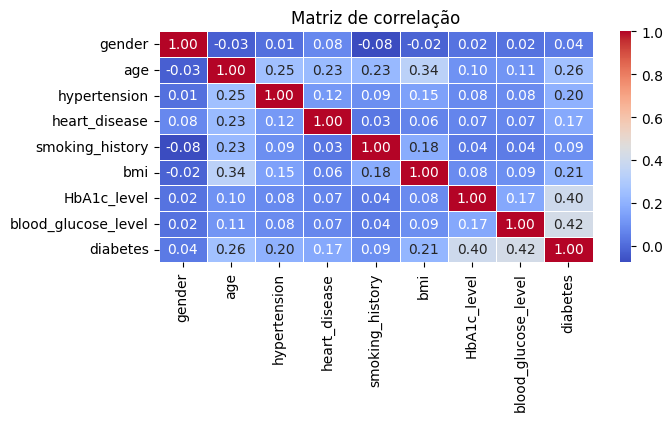

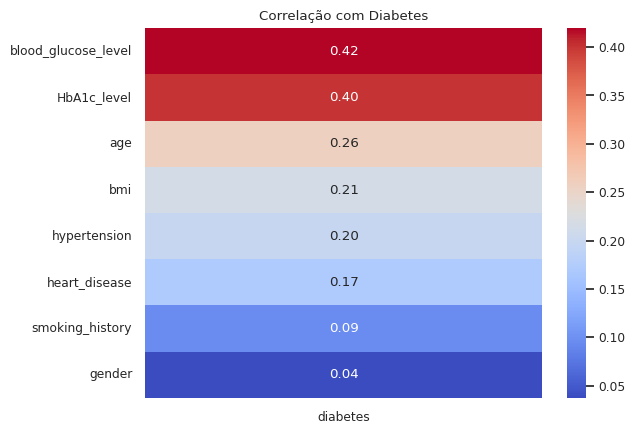

In [ ]:
# Matriz de correlação
correlation_matrix = dados_diabetes_ordinais.corr()
#Gráfico I
plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Matriz de correlação")
plt.show()

#Gráfico II
#Cria o heatmap de correlações com a alvo target
corr = dados_diabetes_ordinais.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Ordem decrescente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlação com Diabetes')
plt.show()

In [ ]:
#NOTA_REDAÇÃO var target, var dependente, quem estamos tentando prever
variaveis = dados_diabetes_ordinais[['diabetes', 'gender', 'age']]


In [ ]:
#análise de correção
variaveis.corr()

diabetes    gender       age
diabetes  1.000000  0.037411  0.258008
gender    0.037411  1.000000 -0.030656
age       0.258008 -0.030656  1.000000

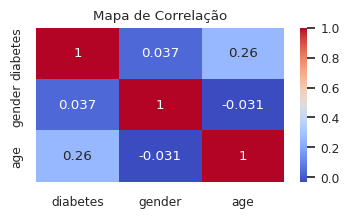

In [ ]:
corr_matrix = variaveis.corr()

plt.figure(figsize=(4, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Mapa de Correlação')
plt.show()

### Remoção de atributos irrelevantes

In [ ]:
# Remoção de Valores Irrelevantes GENDER = 2 - OTHER [0.00018%], mantendo no dataframe somente genero feminino e masculino
# 0 - female
# 1 - male
# 2 - other
dados_diabetes_ordinais = dados_diabetes_ordinais[dados_diabetes_ordinais['gender'] != 2]

In [ ]:
dados_diabetes_ordinais['gender'].value_counts()

0    58552
1    41430
Name: gender, dtype: int64

In [ ]:
dados_diabetes_ordinais['smoking_history'].value_counts()

0    35810
4    35092
3     9352
1     9286
5     6439
2     4003
Name: smoking_history, dtype: int64

In [ ]:
#REMOÇÃO DO ATRIBUTO
del dados_diabetes_ordinais["smoking_history"]

# Verifique que o número de atributos reduziu para 8.

print("\nDimensões:\n{0}\n".format(dados_diabetes_ordinais.shape))


Dimensões:
(99982, 8)



###Conversão de tipos

In [ ]:
#CONVERSÃO DO TIPO DO ATRIBUTO blood_glucose_level DE DISCRETO PARA CONTÍNUO
dados_diabetes_ordinais['blood_glucose_level'] =  dados_diabetes_ordinais['blood_glucose_level'].astype(float)

In [ ]:
#CONVERSÃO DO TIPO DO ATRIBUTO GÊNERO DE CONTÍNUO PARA DISCRETO
dados_diabetes_ordinais['gender'] = dados_diabetes_ordinais['gender'].astype('category').cat.codes
dados_diabetes_ordinais.head()

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0       0  80.0             0              1  25.19          6.6   
1       0  54.0             0              0  27.32          6.6   
2       1  28.0             0              0  27.32          5.7   
3       0  36.0             0              0  23.45          5.0   
4       1  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  
0                140.0         0  
1                 80.0         0  
2                158.0         0  
3                155.0         0  
4                155.0         0

In [ ]:
#CONVERSÃO DO TIPO DO ATRIBUTO age DE DISCRETO PARA DISCRETO
dados_diabetes_ordinais['age'] =  dados_diabetes_ordinais['age'].astype(int)

In [ ]:
# Exibe apenas os campos numéricos:
print(dados_diabetes_ordinais.describe())

             gender           age  hypertension  heart_disease           bmi  \
count  99982.000000  99982.000000  99982.000000   99982.000000  99982.000000   
mean       0.414375     41.877878      0.074863       0.039427     27.320757   
std        0.492616     22.535787      0.263172       0.194610      6.636853   
min        0.000000      0.000000      0.000000       0.000000     10.010000   
25%        0.000000     24.000000      0.000000       0.000000     23.630000   
50%        0.000000     43.000000      0.000000       0.000000     27.320000   
75%        1.000000     60.000000      0.000000       0.000000     29.580000   
max        1.000000     80.000000      1.000000       1.000000     95.690000   

        HbA1c_level  blood_glucose_level      diabetes  
count  99982.000000         99982.000000  99982.000000  
mean       5.527529           138.057810      0.085015  
std        1.070665            40.709469      0.278906  
min        3.500000            80.000000      0.000

In [ ]:
dados_diabetes_ordinais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int8   
 1   age                  99982 non-null  int64  
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   bmi                  99982 non-null  float64
 5   HbA1c_level          99982 non-null  float64
 6   blood_glucose_level  99982 non-null  float64
 7   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), int8(1)
memory usage: 6.2 MB


###Registros Duplicados

In [ ]:
registros_duplicados = dados_diabetes_ordinais[dados_diabetes_ordinais.duplicated()]
print("Quantidade de registros duplicados: ", registros_duplicados.shape)

Quantidade de registros duplicados:  (8726, 8)


In [ ]:
#removendo registros duplicados
dados_diabetes_ordinais = dados_diabetes_ordinais.drop_duplicates()

In [ ]:
for column in dados_diabetes_ordinais.columns:
    registros_unicos = len(dados_diabetes_ordinais[column].unique())
    print(f"{column}: {registros_unicos} distinct values")

gender: 2 distinct values
age: 81 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [ ]:
# Exibe apenas os campos numéricos:
print(dados_diabetes_ordinais.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91256 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               91256 non-null  int8   
 1   age                  91256 non-null  int64  
 2   hypertension         91256 non-null  int64  
 3   heart_disease        91256 non-null  int64  
 4   bmi                  91256 non-null  float64
 5   HbA1c_level          91256 non-null  float64
 6   blood_glucose_level  91256 non-null  float64
 7   diabetes             91256 non-null  int64  
dtypes: float64(3), int64(4), int8(1)
memory usage: 5.7 MB
None


In [ ]:
# Exibe apenas os campos numéricos:
print(dados_diabetes_ordinais.describe())

             gender           age  hypertension  heart_disease           bmi  \
count  91256.000000  91256.000000  91256.000000   91256.000000  91256.000000   
mean       0.417003     41.664033      0.081244       0.042715     27.323056   
std        0.493066     22.620958      0.273211       0.202215      6.944803   
min        0.000000      0.000000      0.000000       0.000000     10.010000   
25%        0.000000     23.000000      0.000000       0.000000     23.100000   
50%        0.000000     43.000000      0.000000       0.000000     27.320000   
75%        1.000000     60.000000      0.000000       0.000000     30.200000   
max        1.000000     80.000000      1.000000       1.000000     95.690000   

        HbA1c_level  blood_glucose_level      diabetes  
count  91256.000000         91256.000000  91256.000000  
mean       5.538739           138.453844      0.092531  
std        1.077238            41.184104      0.289776  
min        3.500000            80.000000      0.000

###Análise e Exploração dos Dados

['gender', 'age', 'hypertension', 'heart_disease', 'bmi, 'HbA1c_level', 'blood_glucose_level', 'diabetes']

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']

###Análise Univariada

**Atributo Gender (Gênero)**

Identificou-se este atributo como sendo uma varíavel categórica nominal. Este atributo inicialmente é do tipo texto, contendo três valores agrupados em Masculino, Feminino e Outros.

In [ ]:
dados_diabetes["gender"]

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object

In [ ]:
dados_diabetes_ordinais["gender"]

0        0
1        0
2        1
3        0
4        1
        ..
99994    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 91256, dtype: int8

In [ ]:
dados_diabetes['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
dados_diabetes_ordinais['gender'].value_counts()

0    53202
1    38054
Name: gender, dtype: int64

In [ ]:
hist_gender =  px.histogram (dados_diabetes,  x = "gender", nbins=60)
hist_gender.update_layout(width=800,height=500,title_text='Gender Distribution')
hist_gender.show()

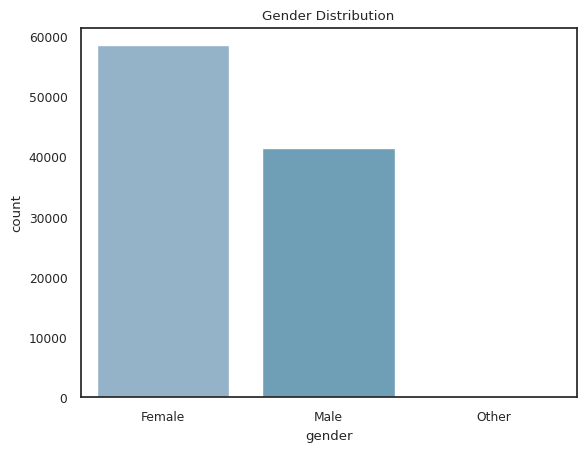

In [ ]:
sns.countplot(x='gender', data=dados_diabetes)
plt.title('Gender Distribution')
plt.show()

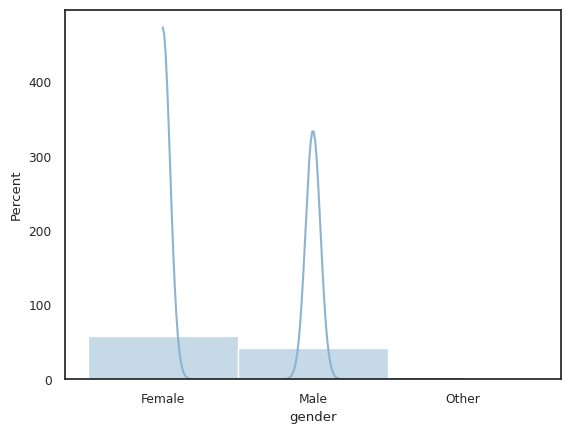

In [ ]:
sns.histplot(dados_diabetes, x='gender', bins=30, kde=True, stat="percent");

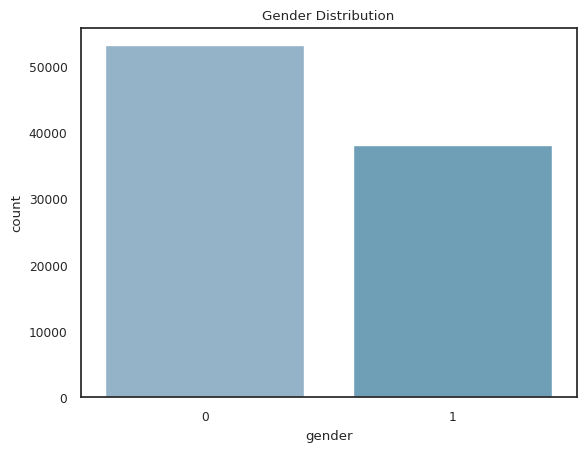

0 - FEMALE - 1 - MALE 


In [ ]:
#APÓS PRÉ-PROCESSAMENTO

sns.countplot(x='gender', data=dados_diabetes_ordinais)
plt.title('Gender Distribution')
plt.show()

print("0 - FEMALE - 1 - MALE ")

**Atributo Smoking History (Histórico de Tabagismo)**

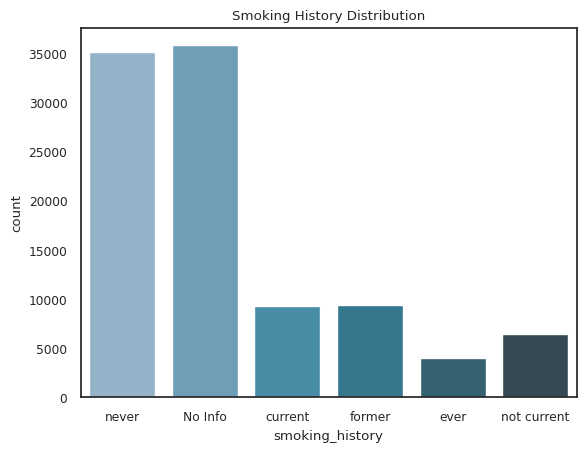

In [ ]:
sns.countplot(x='smoking_history', data=dados_diabetes)
plt.title('Smoking History Distribution')
plt.show()


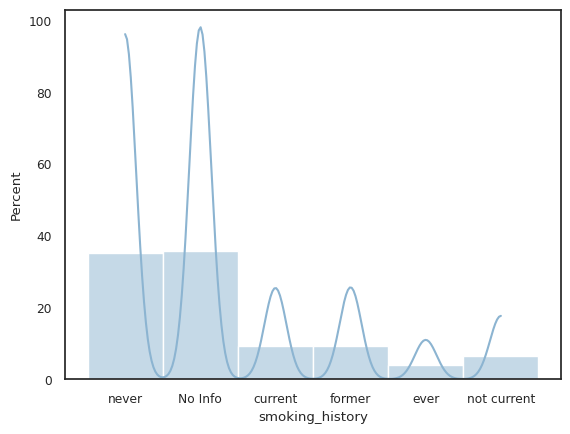

In [ ]:
sns.histplot(dados_diabetes, x='smoking_history', bins=30, kde=True, stat="percent");

**Atributo Age (Idade)**

Conforme verificado a seguir o atributo Idade, é um tipo numérico. Há 5621 pessoas com 80 anos, uma quantidade elevada frente às demais idades constantes na tabela.

In [ ]:
dados_diabetes['age']

0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99995    80.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 100000, dtype: float64

In [ ]:
## converte gender para int
dados_diabetes_ordinais['age'] = dados_diabetes_ordinais['age'].astype(int)
dados_diabetes_ordinais['age']

0        80
1        54
2        28
3        36
4        76
         ..
99994    36
99996     2
99997    66
99998    24
99999    57
Name: age, Length: 91295, dtype: int64

In [ ]:
dados_diabetes_ordinais['age'].value_counts().sort_index()

0      898
1     1157
2     1146
3      977
4      911
      ... 
76     709
77     708
78     652
79     588
80    4463
Name: age, Length: 81, dtype: int64

In [ ]:
hist_age =  px.histogram (dados_diabetes,  x = "age", nbins=60)
hist_age.update_layout(width=800,height=500,title_text='Age Distribution')
hist_age.show()

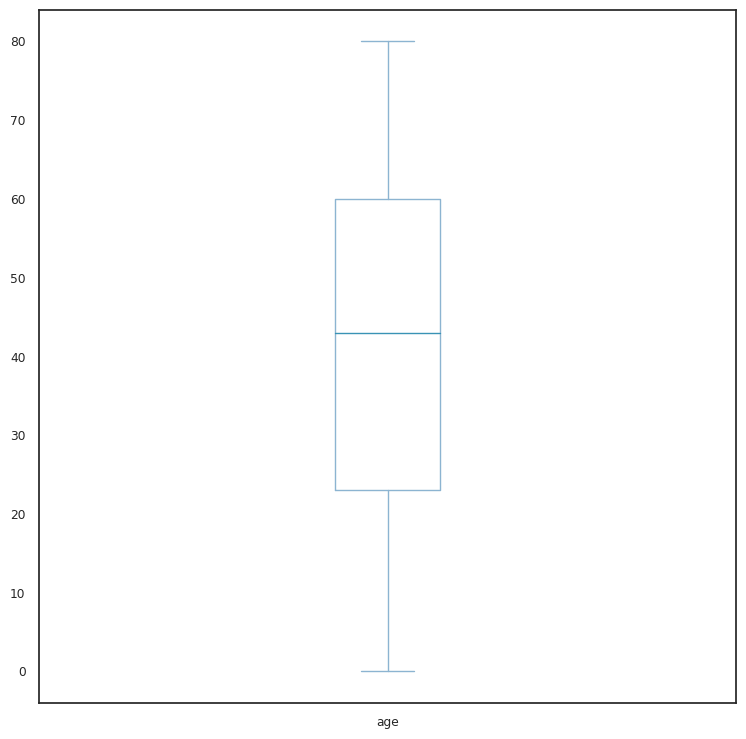

In [ ]:
dados_diabetes_ordinais["age"].plot(kind="box", figsize=(9,9))
index = np.where(dados_diabetes_ordinais["age"] == max(dados_diabetes_ordinais["age"]) )

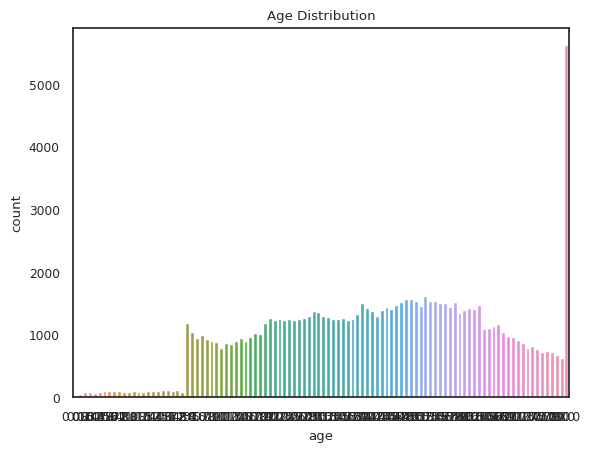

In [ ]:
sns.countplot(x='age', data=dados_diabetes)
plt.title('Age Distribution')
plt.show()

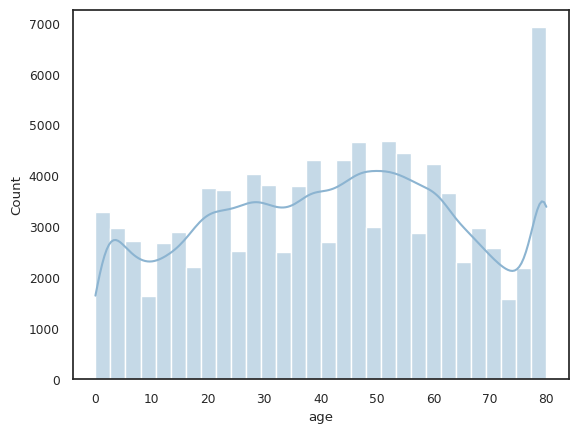

In [ ]:
sns.histplot(dados_diabetes, x='age', bins=30, kde=True, stat="count");

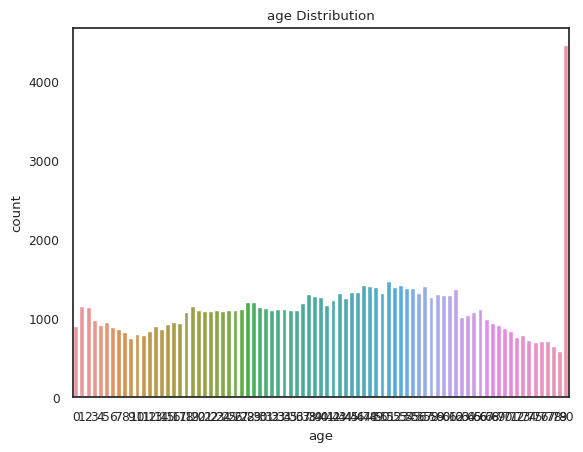

In [ ]:
#APÓS PRÉ-PROCESSAMENTO

sns.countplot(x='age', data=dados_diabetes_ordinais)
plt.title('age Distribution')
plt.show()

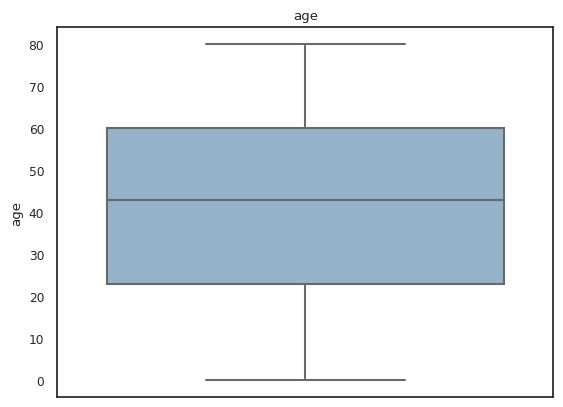

In [ ]:
#APÓS PRÉ-PROCESSAMENTO

sns.boxplot( y='age', data=dados_diabetes_ordinais)
plt.title('age')
plt.show()

**Atributo Hypertension (Hipertensão)**

Variável categórica ordinal, possui ou não possui hipertensão

In [ ]:
dados_diabetes['hypertension']

0        0
1        0
2        0
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: hypertension, Length: 100000, dtype: int64

In [ ]:
dados_diabetes['hypertension'].value_counts().sort_index()

0    92515
1     7485
Name: hypertension, dtype: int64

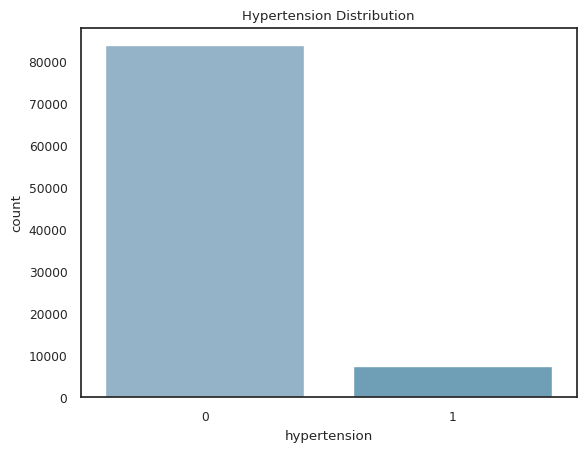

0 - SEM HIPERTENSÃO - 1 - COM HIPERTENSÃO 


In [ ]:
#PÓS-PRÉ-PROCESSAMENTO

sns.countplot(x='hypertension', data=dados_diabetes_ordinais)
plt.title('Hypertension Distribution')
plt.show()

print("0 - SEM HIPERTENSÃO - 1 - COM HIPERTENSÃO ")

**Atributo Heart Disease (Doença Cardíaca)**

Variável categórica ordinal, possui ou não possui doença cardíaca

In [ ]:
dados_diabetes['heart_disease']

0        1
1        0
2        0
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: heart_disease, Length: 100000, dtype: int64

In [ ]:
dados_diabetes['heart_disease'].value_counts().sort_index()

0    96058
1     3942
Name: heart_disease, dtype: int64

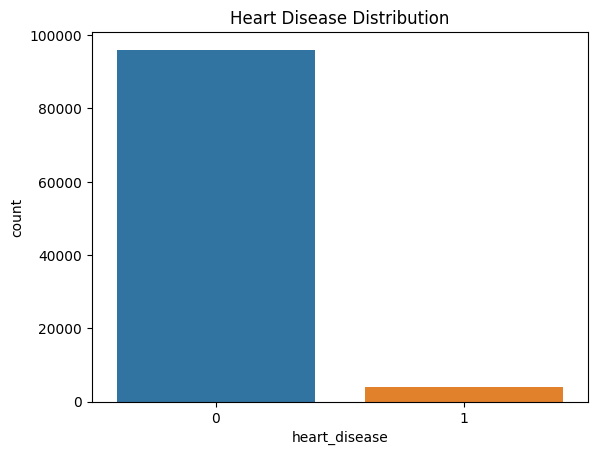

In [ ]:
sns.countplot(x='heart_disease', data=dados_diabetes)
plt.title('Heart Disease Distribution')
plt.show()

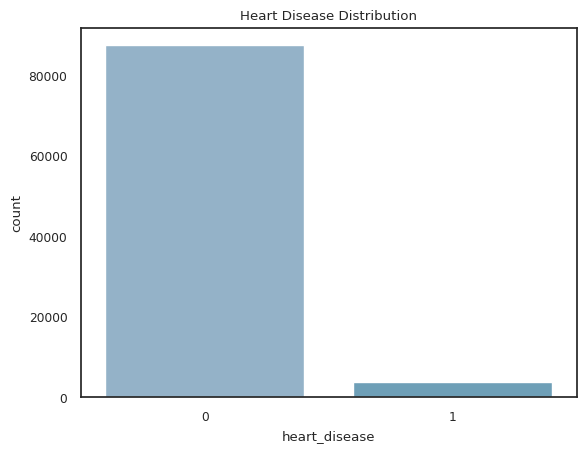

0 - SEM DOENÇA CARDÍACA - 1 - COM DOENÇA CARDÍACA 


In [ ]:
#PÓS-PRÉ-PROCESSAMENTO

sns.countplot(x='heart_disease', data=dados_diabetes_ordinais)
plt.title('Heart Disease Distribution')
plt.show()

print("0 - SEM DOENÇA CARDÍACA - 1 - COM DOENÇA CARDÍACA ")

**Atributo Smoking History (Histórico de Tabagismo)**

Atributo do tipo texto com várias ocorrencias a se verificar

In [ ]:
dados_diabetes['smoking_history']

0          never
1        No Info
2          never
3        current
4        current
          ...   
99995    No Info
99996    No Info
99997     former
99998      never
99999    current
Name: smoking_history, Length: 100000, dtype: object

In [ ]:
dados_diabetes['smoking_history'].value_counts().sort_index()

No Info        35816
current         9286
ever            4004
former          9352
never          35095
not current     6447
Name: smoking_history, dtype: int64

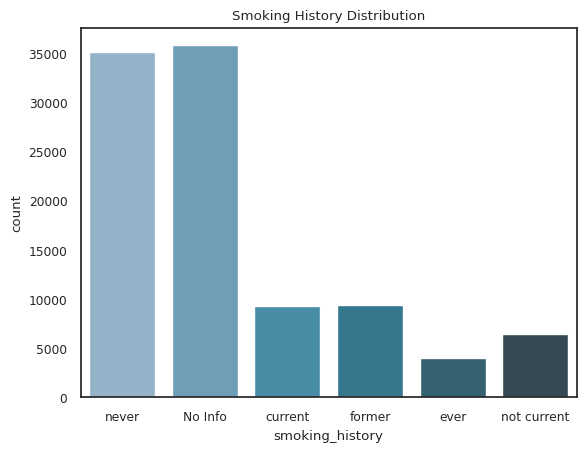

In [ ]:
sns.countplot(x='smoking_history', data=dados_diabetes)
plt.title('Smoking History Distribution')
plt.show()

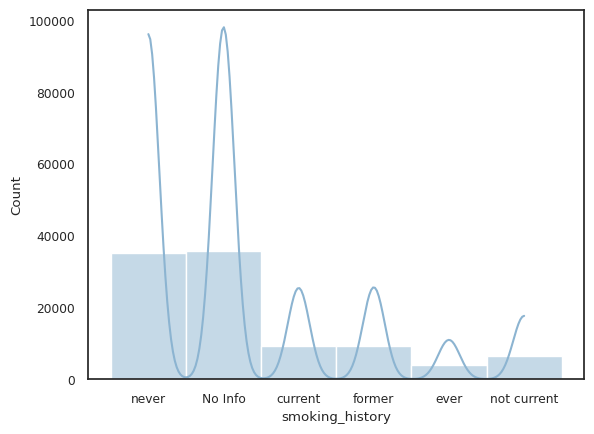

In [ ]:
sns.histplot(dados_diabetes, x='smoking_history', bins=30, kde=True, stat="count");

**Atributo BMI (IMC)**

Índice de Massa Corporal

In [ ]:
dados_diabetes['bmi']

0        25.19
1        27.32
2        27.32
3        23.45
4        20.14
         ...  
99995    27.32
99996    17.37
99997    27.83
99998    35.42
99999    22.43
Name: bmi, Length: 100000, dtype: float64

In [ ]:
dados_diabetes['bmi'].value_counts().sort_index()

10.01    2
10.08    1
10.14    1
10.19    1
10.21    1
        ..
88.72    1
88.76    1
91.82    1
95.22    1
95.69    1
Name: bmi, Length: 4247, dtype: int64

In [ ]:
hist_age =  px.histogram (dados_diabetes,  x = "bmi", nbins=60)
hist_age.update_layout(width=800,height=500,title_text='BMI Distribution')
hist_age.show()

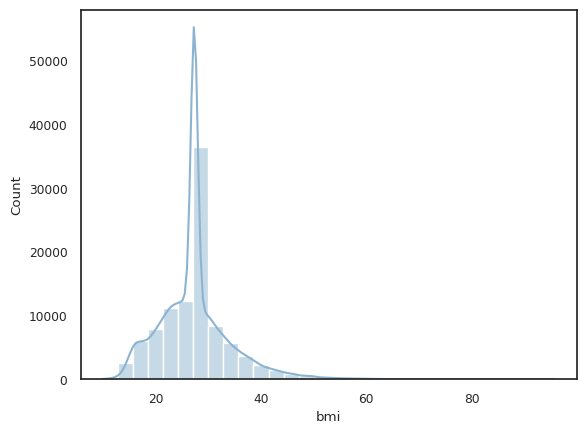

In [ ]:
sns.histplot(dados_diabetes, x='bmi', bins=30, kde=True, stat="count");

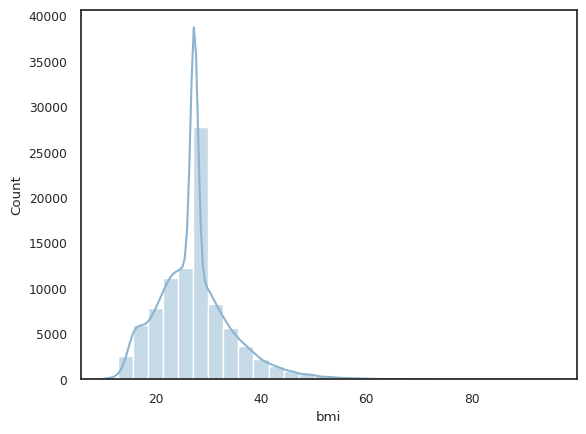

In [ ]:
#PÓS PRÉ-PROCESSAMENTO

sns.histplot(dados_diabetes_ordinais, x='bmi', bins=30, kde=True, stat="count");


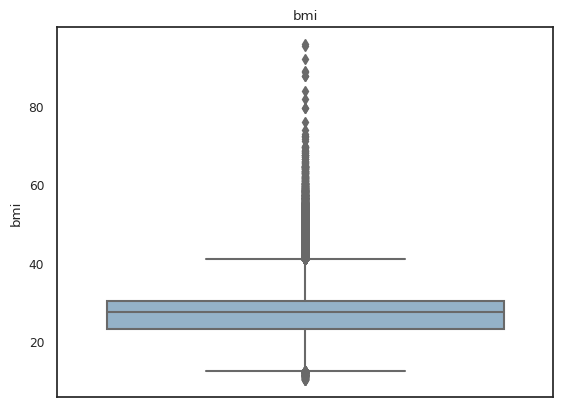

In [ ]:
#PÓS PRÉ-PROCESSAMENTO

sns.boxplot( y='bmi', data=dados_diabetes_ordinais)
plt.title('bmi')
plt.show()

**Atributo HbA1c Level (Nível de HbA1c)**

Atributo

In [ ]:
dados_diabetes['HbA1c_level']

0        6.6
1        6.6
2        5.7
3        5.0
4        4.8
        ... 
99995    6.2
99996    6.5
99997    5.7
99998    4.0
99999    6.6
Name: HbA1c_level, Length: 100000, dtype: float64

In [ ]:
dados_diabetes['HbA1c_level'].value_counts().sort_index()

3.5    7662
4.0    7542
4.5    7585
4.8    7597
5.0    7471
5.7    8413
5.8    8321
6.0    8295
6.1    8048
6.2    8269
6.5    8362
6.6    8540
6.8     642
7.0     634
7.5     643
8.2     661
8.8     661
9.0     654
Name: HbA1c_level, dtype: int64

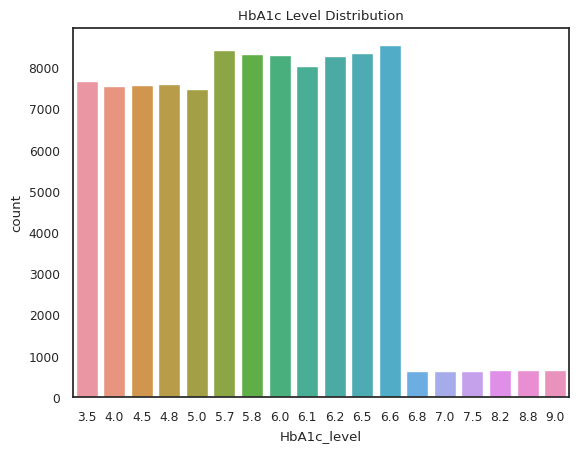

In [ ]:
sns.countplot(x='HbA1c_level', data=dados_diabetes)
plt.title('HbA1c Level Distribution')
plt.show()

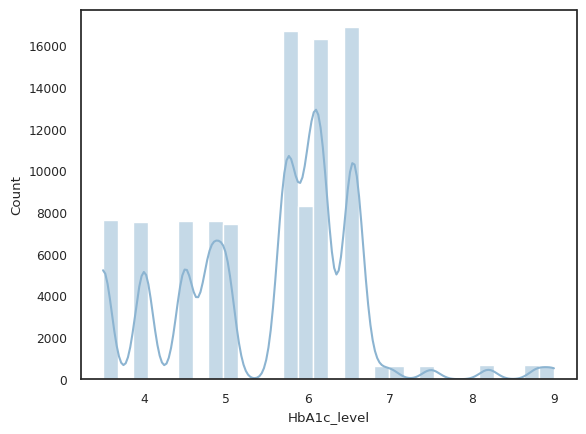

In [ ]:
sns.histplot(dados_diabetes, x='HbA1c_level', bins=30, kde=True, stat="count");

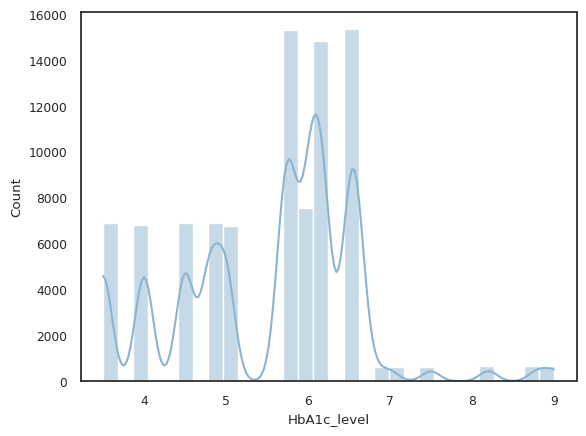

In [ ]:
#PÓS PRÉ-PROCESSAMENTO

sns.histplot(dados_diabetes_ordinais, x='HbA1c_level', bins=30, kde=True, stat="count");

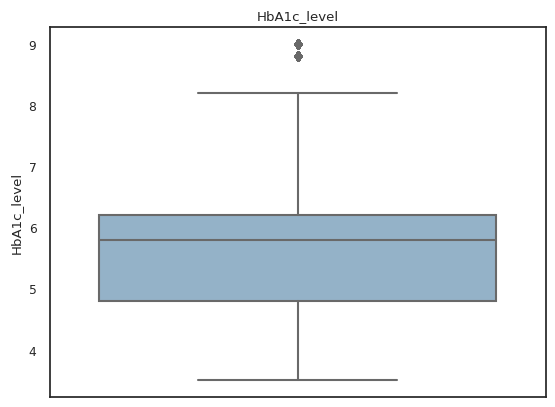

In [ ]:
#PÓS PRÉ-PROCESSAMENTO

sns.boxplot( y='HbA1c_level', data=dados_diabetes_ordinais)
plt.title('HbA1c_level')
plt.show()

**Atributo Blood Glucose Level (Nível de Glicose no Sangue)**

Atributo

In [ ]:
dados_diabetes['blood_glucose_level']

0        140
1         80
2        158
3        155
4        155
        ... 
99995     90
99996    100
99997    155
99998    100
99999     90
Name: blood_glucose_level, Length: 100000, dtype: int64

In [ ]:
dados_diabetes['blood_glucose_level'].value_counts().sort_index()

80     7106
85     6901
90     7112
100    7025
126    7702
130    7794
140    7732
145    7679
155    7575
158    7026
159    7759
160    7712
200    7600
220     603
240     636
260     635
280     729
300     674
Name: blood_glucose_level, dtype: int64

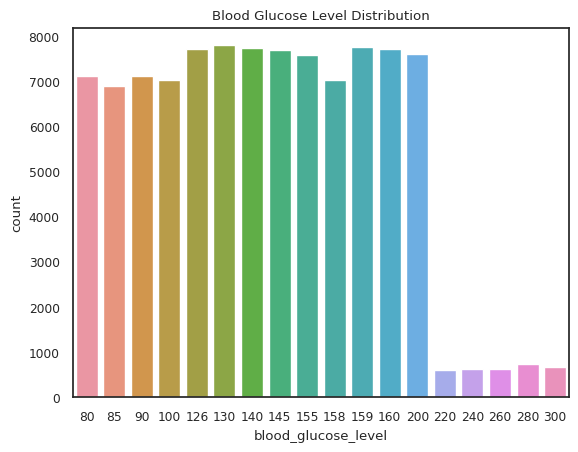

In [ ]:
sns.countplot(x='blood_glucose_level', data=dados_diabetes)
plt.title('Blood Glucose Level Distribution')
plt.show()

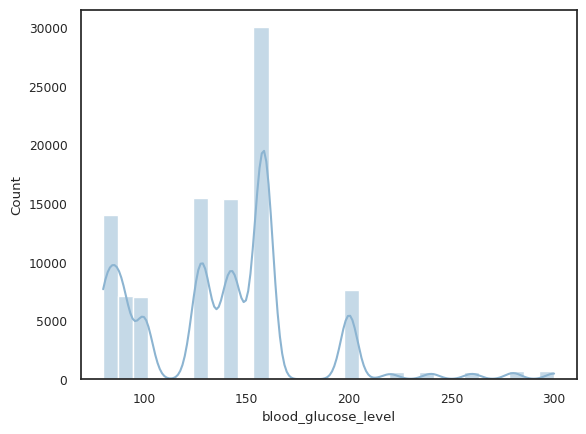

In [ ]:
sns.histplot(dados_diabetes, x='blood_glucose_level', bins=30, kde=True, stat="count");

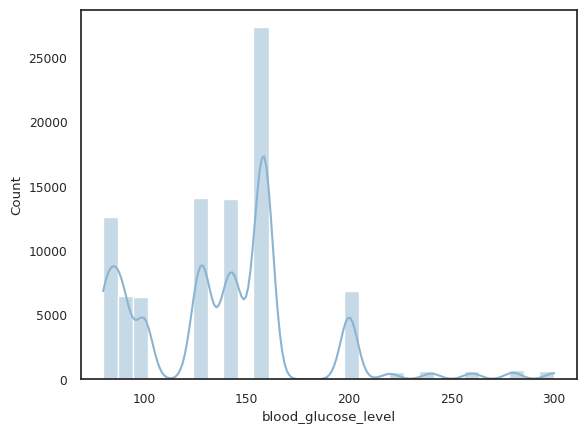

In [ ]:
#PÓS PRÉ-PROCESSAMENTO

sns.histplot(dados_diabetes_ordinais, x='blood_glucose_level', bins=30, kde=True, stat="count");

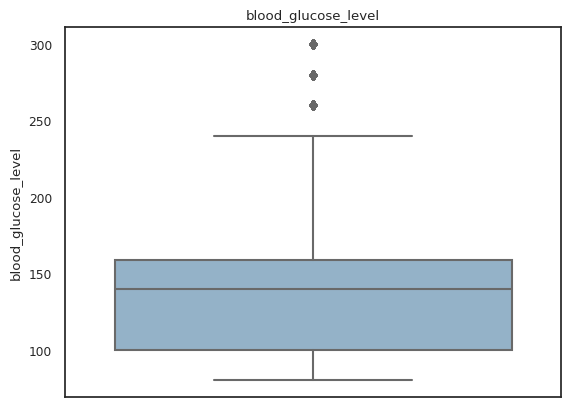

In [ ]:
#PÓS PRÉ-PROCESSAMENTO

sns.boxplot( y='blood_glucose_level', data=dados_diabetes_ordinais)
plt.title('blood_glucose_level')
plt.show()

###Análise Bivariada

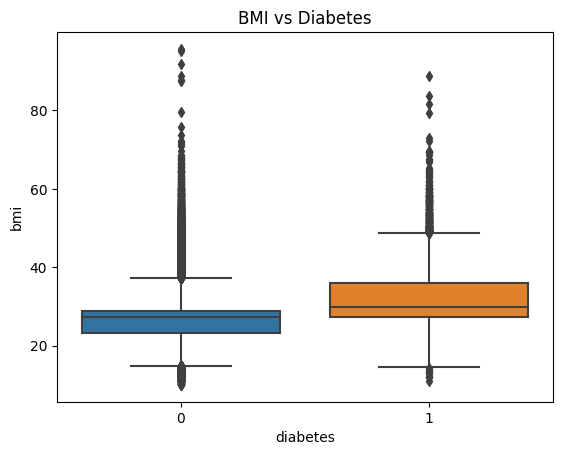

In [ ]:
#Boxplot BMI vs Diabetes
sns.boxplot(x='diabetes', y='bmi', data=dados_diabetes_ordinais)
plt.title('BMI vs Diabetes')
plt.show()

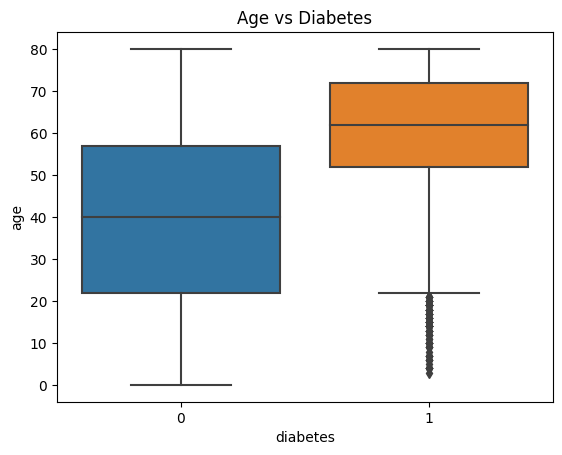

In [ ]:
# Boxplot Age vs Diabetes
sns.boxplot(x='diabetes', y='age', data=dados_diabetes_ordinais)
plt.title('Age vs Diabetes')
plt.show()

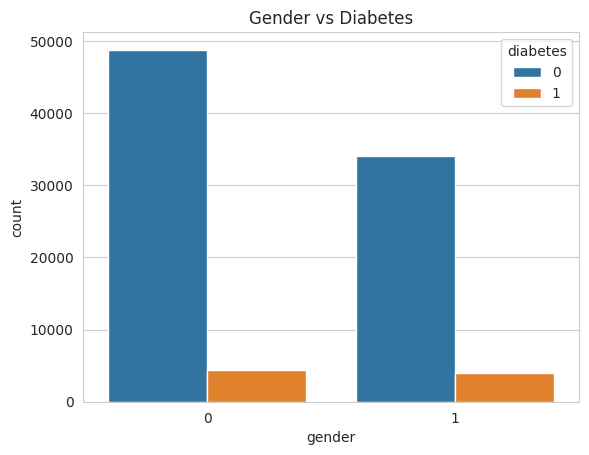

0 - FEMALE - 1 - MALE 
0 - SEM DIABETES - 1 - COM DIABETES 


In [ ]:
# Contagem para gender vs diabetes
# 0 feminino
# 1 masculino
sns.countplot(x='gender', hue='diabetes', data=dados_diabetes_ordinais)
plt.title('Gender vs Diabetes')
plt.show()

print("0 - FEMALE - 1 - MALE ")
print("0 - SEM DIABETES - 1 - COM DIABETES ")

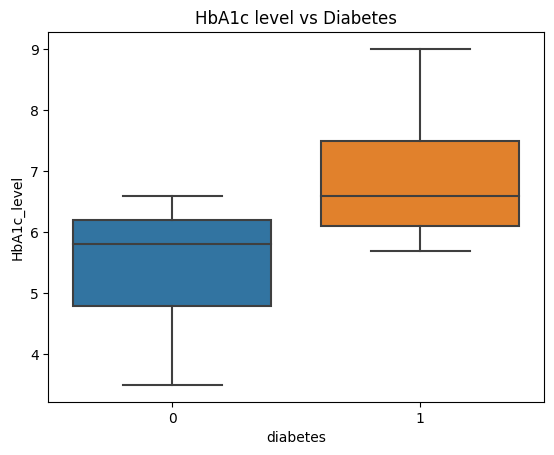

In [ ]:
# Boxplot HbA1c level vs Diabetes
sns.boxplot(x='diabetes', y='HbA1c_level', data=dados_diabetes_ordinais)
plt.title('HbA1c level vs Diabetes')
plt.show()

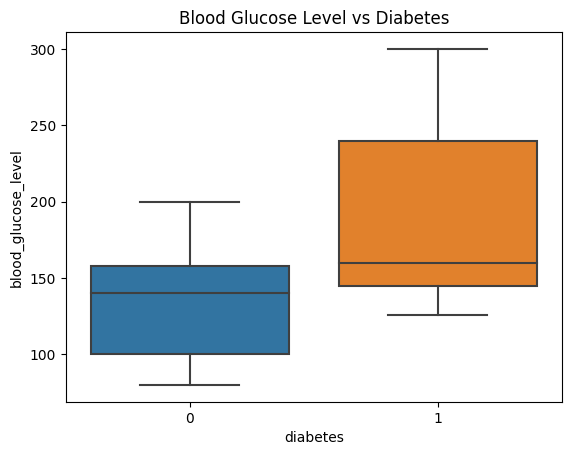

In [ ]:
# Boxplot blood glucose level vs Diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=dados_diabetes_ordinais)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

###Análise Multivariada

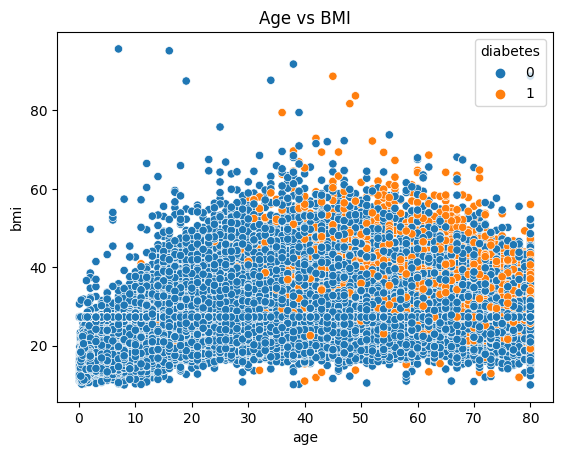

In [ ]:
#Scatterplot AGE x BMI com diabetes

sns.scatterplot(x='age', y='bmi', hue='diabetes', data=dados_diabetes_ordinais)
plt.title('Age vs BMI')
plt.show()

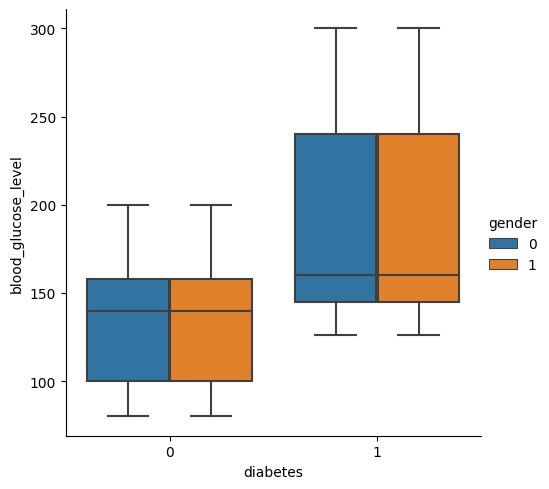

In [ ]:
sns.catplot(data = dados_diabetes_ordinais, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

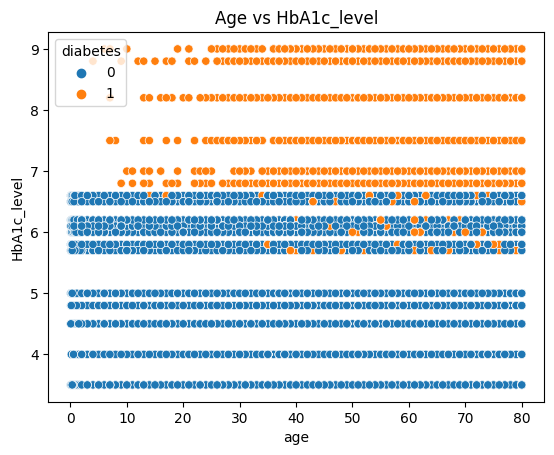

In [ ]:
#Scatterplot AGE x HbA1c_level com diabetes

sns.scatterplot(x='age', y='HbA1c_level', hue='diabetes', data=dados_diabetes_ordinais)
plt.title('Age vs HbA1c_level')
plt.show()

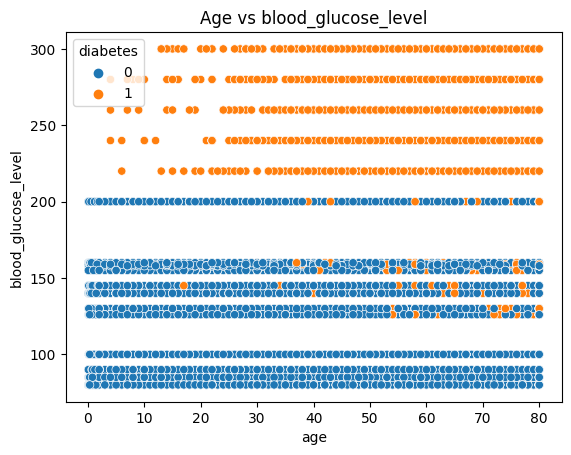

In [ ]:
#Scatterplot AGE X blood_glucose_level com diabetes

sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=dados_diabetes_ordinais)
plt.title('Age vs blood_glucose_level')
plt.show()

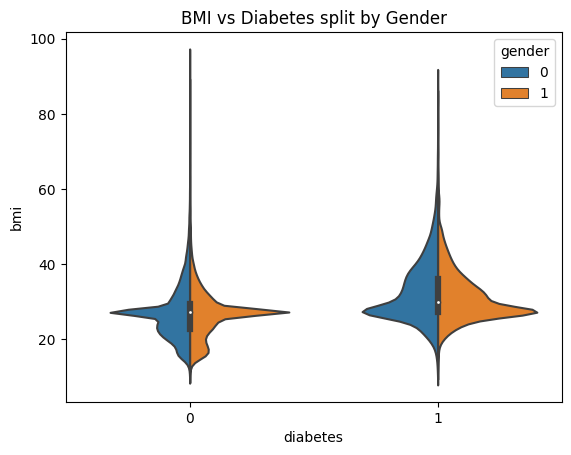

In [ ]:
# Gráfico violino BMI vx diabetes por gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=dados_diabetes_ordinais)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

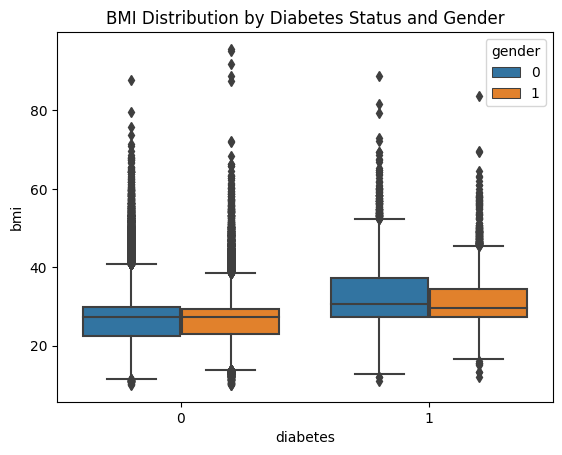

In [ ]:
# Bloxplot entre gender, BMI e diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=dados_diabetes_ordinais)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

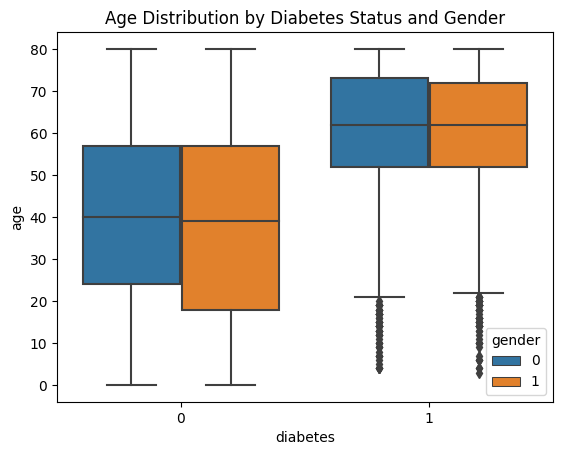

In [ ]:
# Bloxplot entre gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=dados_diabetes_ordinais)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

###PARTE B

In [ ]:
dados_diabetes_ordinais.head()

gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0       0   80             0              1  25.19          6.6   
1       0   54             0              0  27.32          6.6   
2       1   28             0              0  27.32          5.7   
3       0   36             0              0  23.45          5.0   
4       1   76             1              1  20.14          4.8   

   blood_glucose_level  diabetes  
0                140.0         0  
1                 80.0         0  
2                158.0         0  
3                155.0         0  
4                155.0         0

In [ ]:
previsores_diabetes = dados_diabetes_ordinais.iloc[:, 0:7].values
previsores_diabetes

array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [ ]:
previsores_diabetes.shape

(91256, 7)

In [ ]:
alvo = dados_diabetes_ordinais.iloc[:, 7].values #alvo são os y
alvo

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
alvo.shape

(91256,)

###Divisão em treino e teste normal

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(previsores_diabetes, alvo, test_size = 0.3, random_state = 0)

In [ ]:
X_treino.shape

(63879, 7)

In [ ]:
X_teste.shape

(27377, 7)

In [ ]:
y_treino.shape

(63879,)

In [ ]:
y_teste.shape

(27377,)

###Balanceamento da árvore com SMOTEEN


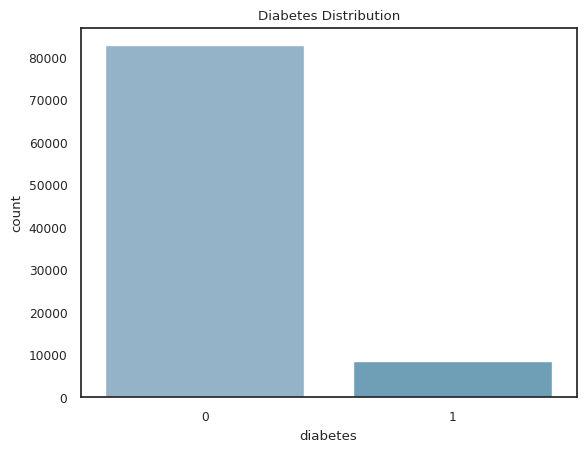

In [ ]:
# Contagem do atributo diabetes
sns.countplot(x='diabetes', data=dados_diabetes_ordinais)
plt.title('Diabetes Distribution')
plt.show()

In [ ]:
#Combinando Sub-amostragem e Super-amostragem

print("Antes: ", Counter(y_treino)) # exibindo a distribuição de classes

sample = SMOTEENN(sampling_strategy=1) # estratégia de reamostragem
X_treino_balanceada, y_treino_balanceada = sample.fit_resample(X_treino, y_treino)

print("Depois: ", Counter(y_treino)) # exibindo a distribuição de classes

Antes:  Counter({0: 57980, 1: 5899})
Depois:  Counter({0: 57980, 1: 5899})


In [ ]:
#TOTALIZANDO

print("Antes, Sem diadetes '0': {}".format(sum(y_treino == 0)))
print("Antes, Diabetes '1': {} \n".format(sum(y_treino == 1)))

print("Depois, Sem diadetes '0': {}".format(sum(y_treino_balanceada == 0)))
print("Depois, Diabetes '1': {}".format(sum(y_treino_balanceada == 1)))


Antes, Sem diadetes '0': 57980
Antes, Diabetes '1': 5899 

Depois, Sem diadetes '0': 50453
Depois, Diabetes '1': 54586


In [ ]:
print("Antes total:", y_treino.shape) #antes da divisão treino/teste
print("Depois total:",  y_treino_balanceada.shape) #pós da divisão treino/teste

Antes total: (63879,)
Depois total: (105039,)


###Alternando entre dados não balanceados e balanceados, descomente o que deseja utilizar


In [ ]:
#Selecione entre as variáveis desbalanceadas ou balanceadas comentando-os abaixo
#SEM balanceamento
X_treino_arvore = X_treino
y_treino_arvore = y_treino

#COM balanceamento - para tanto necessário rodar SMOTTEN primeiramente
#X_treino_arvore = X_treino_balanceada
#y_treino_arvore = y_treino_balanceada

### Validação Cruzada

In [ ]:
#Separando os dados em folds
kfold = KFold(n_splits = 10, shuffle=True, random_state = 1)

In [ ]:
#Criando o modelo
validacao_modelo = DecisionTreeClassifier(criterion='gini', random_state = 1, max_depth=6, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')   #
validacao_resultado = cross_val_score(validacao_modelo, X_treino_arvore, y_treino_arvore, cv = kfold)

print("Acurácia Média: %.2f%%" % (validacao_resultado.mean() * 100.0))

Acurácia Média: 96.92%


###Tuning Hiperparâmetros

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'max_depth': ['none', 3, 4, 6],
              'splitter': ['best', 'random'],  #escolha das divisões em cada nó
              'min_samples_split': [2, 5, 10], #num minimo de registro, se vai pra esq ou dir
              'min_samples_leaf': [1, 5, 10] #num minimo pra nó ser considerado folha
}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parametros)

In [ ]:
grid_search.fit(X_treino_arvore, y_treino_arvore)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.9692230784972313


###Implementação da Árvore de Decisão


In [ ]:
#implementação da Árvore de Decisão
arvore_diabetes = DecisionTreeClassifier(criterion='gini', random_state = 0, max_depth=6, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best') #,
arvore_diabetes.fit(X_treino_arvore, y_treino_arvore)


DecisionTreeClassifier(max_depth=6, random_state=0)

In [ ]:
previsores_arvore_diabetes = arvore_diabetes.predict(X_teste)
previsores_arvore_diabetes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_teste

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsores_arvore_diabetes) * 100.0))

Acurácia: 96.97%


In [ ]:
confusion_matrix(y_teste, previsores_arvore_diabetes)


array([[24832,     0],
       [  829,  1716]])

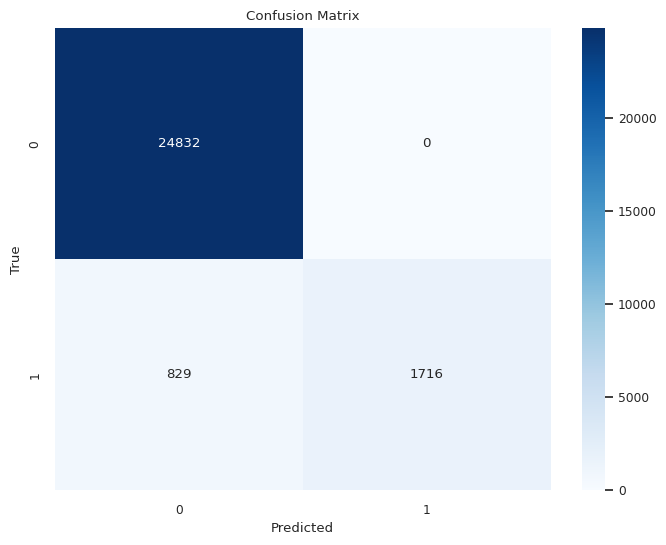

In [ ]:
# Plot confusion matrix
matriz_confusao = confusion_matrix(y_teste, previsores_arvore_diabetes)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_teste, previsores_arvore_diabetes))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     24832
           1       1.00      0.67      0.81      2545

    accuracy                           0.97     27377
   macro avg       0.98      0.84      0.89     27377
weighted avg       0.97      0.97      0.97     27377



**Análise dados de treino**

In [ ]:
previsores_treino_diabetes = arvore_diabetes.predict(X_treino_arvore) #COMPARANDO TREINO COM PREVISÕES
previsores_treino_diabetes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_treino_arvore, previsores_treino_diabetes)

0.9692230623522597

In [ ]:
confusion_matrix(y_treino_arvore, previsores_treino_diabetes)


array([[57980,     0],
       [ 1966,  3933]])

In [ ]:
previsores_treino_diabetes.shape

(63879,)

###Impressão da árvore

[Text(0.703125, 0.9285714285714286, 'x[5] <= 6.7\ngini = 0.168\nsamples = 63879\nvalue = [57980, 5899]'),
 Text(0.640625, 0.7857142857142857, 'x[6] <= 210.0\ngini = 0.099\nsamples = 61159\nvalue = [57980, 3179]'),
 Text(0.578125, 0.6428571428571429, 'x[1] <= 53.5\ngini = 0.063\nsamples = 59946\nvalue = [57980, 1966]'),
 Text(0.40625, 0.5, 'x[4] <= 36.425\ngini = 0.026\nsamples = 41014\nvalue = [40476, 538]'),
 Text(0.25, 0.35714285714285715, 'x[1] <= 38.5\ngini = 0.019\nsamples = 37696\nvalue = [37335, 361]'),
 Text(0.125, 0.21428571428571427, 'x[5] <= 5.35\ngini = 0.008\nsamples = 26156\nvalue = [26046, 110]'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.0\nsamples = 10772\nvalue = [10772, 0]'),
 Text(0.1875, 0.07142857142857142, 'gini = 0.014\nsamples = 15384\nvalue = [15274, 110]'),
 Text(0.375, 0.21428571428571427, 'x[5] <= 5.35\ngini = 0.043\nsamples = 11540\nvalue = [11289, 251]'),
 Text(0.3125, 0.07142857142857142, 'gini = 0.0\nsamples = 4700\nvalue = [4700, 0]'),
 Text(0.4375,

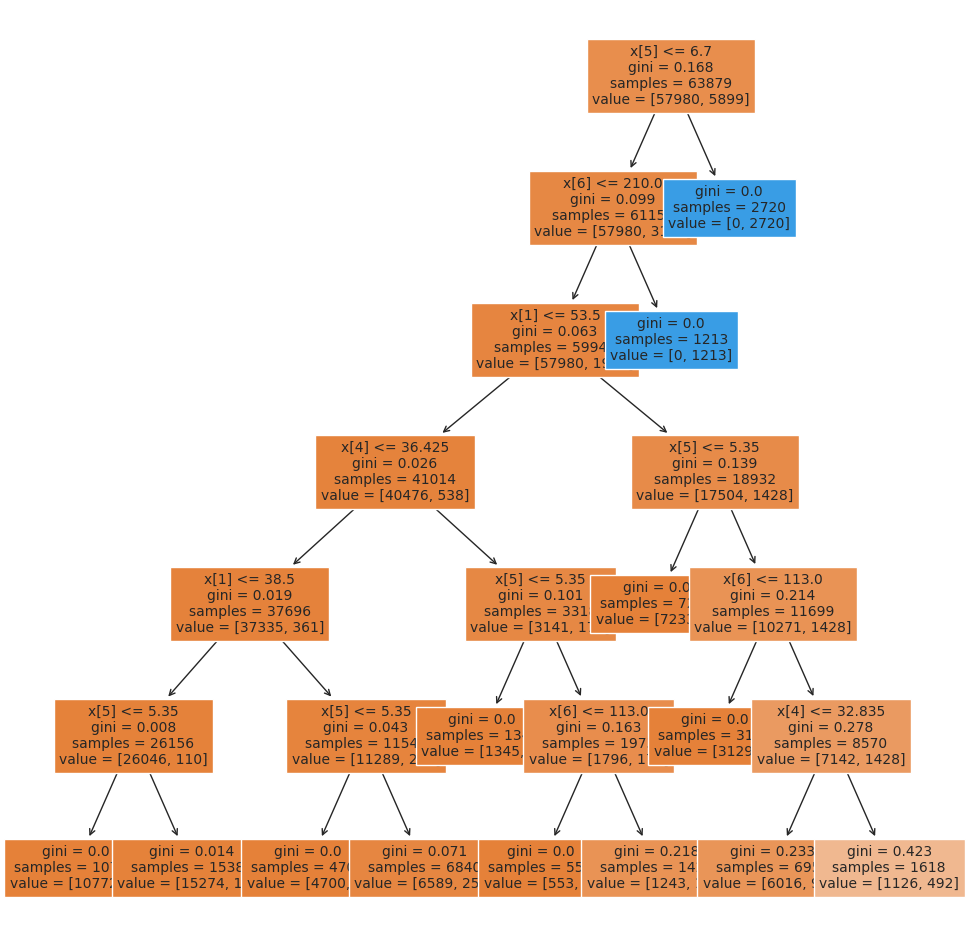

In [ ]:
#visualizando árvore
#alternar entre validacao_modelo e arvore_diabetes

#modelo = arvore_diabetes #marcar este quando não usar validação cruzada
modelo = validacao_modelo #marcar este quando usar validação cruzada


plt.figure(figsize=(12,12))
tree.plot_tree(modelo.fit(X_treino_arvore, y_treino_arvore), filled='True', fontsize=10)

###Exibir melhores atributos classificados

               Feature  Importance
5          HbA1c_level    0.668136
6  blood_glucose_level    0.317508
1                  age    0.014356
0               gender    0.000000
2         hypertension    0.000000
3        heart_disease    0.000000
4                  BMI    0.000000


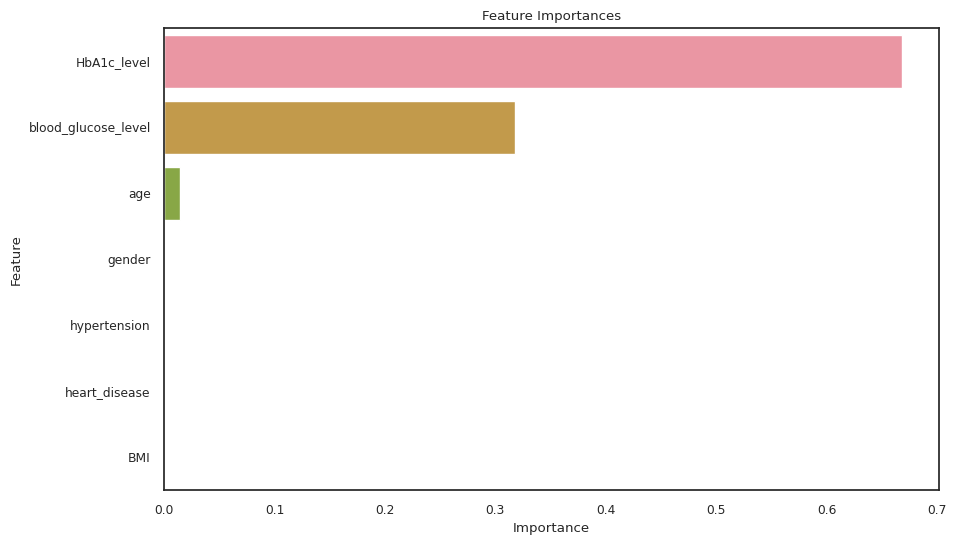

In [ ]:
# Adicionando os nomes
feature_names = ['gender', 'age','hypertension',  'heart_disease', 'BMI', 'HbA1c_level', 'blood_glucose_level']

# Verificando os atributos mais importantes
importances = grid_search.best_estimator_.feature_importances_

# Criando o dataframe com atributos mais importantes
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Classificando os mais importantes
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

# Gráfico com atributos mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

###Curva ROC

In [ ]:
train_score, test_score = validation_curve(
    modelo, X=X_treino_arvore, y=y_treino_arvore,
    param_name='max_depth',
    param_range=range(1, 15),
    scoring="roc_auc",
    cv=10)

In [ ]:
mean_train_score = np.mean(train_score, axis=1)

In [ ]:
mean_test_score = np.mean(test_score, axis=1)

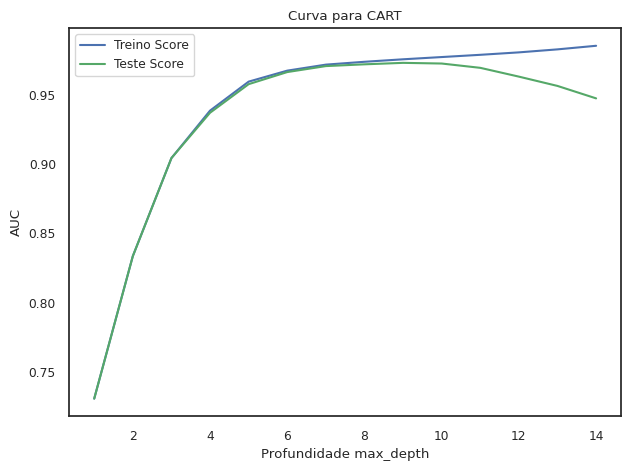

In [ ]:
plt.plot(range(1, 15), mean_train_score,
         label="Treino Score", color='b')
plt.plot(range(1, 15), mean_test_score,
         label="Teste Score", color='g')

plt.title("Curva para CART")
plt.xlabel("Profundidade max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()